In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('heart1.xls')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
X=df.drop(columns=['target'])
y=df['target']

In [3]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
st=StandardScaler()
x_scaled=st.fit_transform(X)

In [11]:
x_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=2)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lg=LogisticRegression()

In [16]:
lg.fit(x_train,y_train)

LogisticRegression()

In [18]:
lg.coef_

array([[-0.01744689, -0.84990071,  0.86868068, -0.28428338, -0.23821638,
        -0.03109391,  0.24972427,  0.42969751, -0.42492345, -0.46426936,
         0.4329757 , -0.68014051, -0.45888283]])

In [20]:
lg.intercept_

array([0.24039595])

In [21]:
y_pred_test=lg.predict(x_test)
y_pred_test

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [22]:
y_pred_train=lg.predict(x_train)
y_pred_train

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0],
      dtype=int64)

In [23]:
lg.predict_proba(x_train)

array([[0.94172343, 0.05827657],
       [0.32881455, 0.67118545],
       [0.36533045, 0.63466955],
       [0.09536051, 0.90463949],
       [0.24629922, 0.75370078],
       [0.50126271, 0.49873729],
       [0.02388308, 0.97611692],
       [0.40719753, 0.59280247],
       [0.02270352, 0.97729648],
       [0.7588076 , 0.2411924 ],
       [0.34153242, 0.65846758],
       [0.86654343, 0.13345657],
       [0.97819121, 0.02180879],
       [0.01339025, 0.98660975],
       [0.17374232, 0.82625768],
       [0.03963783, 0.96036217],
       [0.04070906, 0.95929094],
       [0.99250517, 0.00749483],
       [0.46693765, 0.53306235],
       [0.91635186, 0.08364814],
       [0.22334634, 0.77665366],
       [0.13077685, 0.86922315],
       [0.2774698 , 0.7225302 ],
       [0.13745102, 0.86254898],
       [0.02102888, 0.97897112],
       [0.62444516, 0.37555484],
       [0.10917543, 0.89082457],
       [0.04759164, 0.95240836],
       [0.47864138, 0.52135862],
       [0.25136263, 0.74863737],
       [0.

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score\
,recall_score,f1_score

In [25]:
accuracy_score(y_train,y_pred_train)

0.8264462809917356

In [26]:
accuracy_score(y_test,y_pred_test)

0.8688524590163934

In [30]:
precision_score(y_train,y_pred_train)

0.8133333333333334

In [32]:
recall_score(y_train,y_pred_train)

0.8970588235294118

In [27]:
import seaborn as sns

<Axes: >

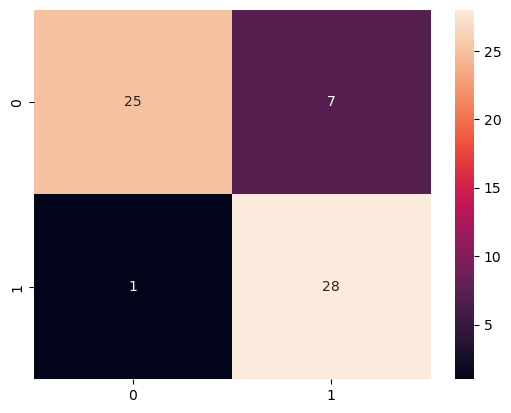

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True)

In [38]:
pd.DataFrame(confusion_matrix(y_test,y_pred_test),columns=list(range(0,2)))

,0,1
0,25,7
1,1,28


In [80]:
import seaborn as sns

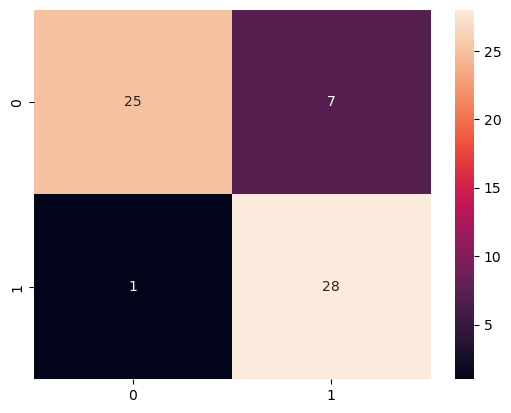

In [81]:

sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True);